In [1]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import ast

# setting plots theme
sns.set_theme(style="ticks")

# loading data
data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()

# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(func=(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills))

# How well do jobs and skills pay for Data Analysts?

### Methodology
1. Evaluate median salary for top 6 jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [2]:
# Filtered data containing not null values for salary_year_avg
df_filtered = df.dropna(subset=["salary_year_avg"])

In [3]:
# most posted jobs
job_titles = df_filtered["job_title_short"].value_counts().head(6).index.to_list()

In [4]:
# Selecting only most posted posts
df_filtered = df_filtered[df_filtered["job_title_short"].isin(job_titles)]

In [5]:
# ordering job titles based on median salary in decending order
ordered_titles = df_filtered.groupby("job_title_short")["salary_year_avg"].agg("median").sort_values(ascending=False).index.tolist()

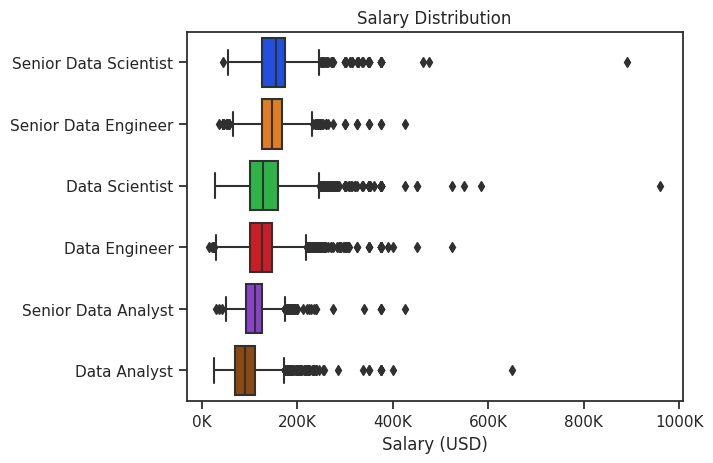

In [6]:
fig, ax = plt.subplots()
sns.boxplot(data=df_filtered, x="salary_year_avg", y="job_title_short", palette="bright", order=ordered_titles, ax=ax)
ax.set_title("Salary Distribution")
ax.set_ylabel("")
ax.set_xlabel("Salary (USD)")
ax.xaxis.set_major_formatter(lambda x,pos:f"{int(x/1000)}K")
plt.show()

In [7]:
data = df.copy()

In [8]:
data.dropna(subset=["salary_year_avg"], inplace=True)

In [9]:
job_in_order = data.groupby("job_title_short")["salary_year_avg"].agg("median").sort_values(ascending=False).index.tolist()

<Axes: xlabel='salary_year_avg', ylabel='job_title_short'>

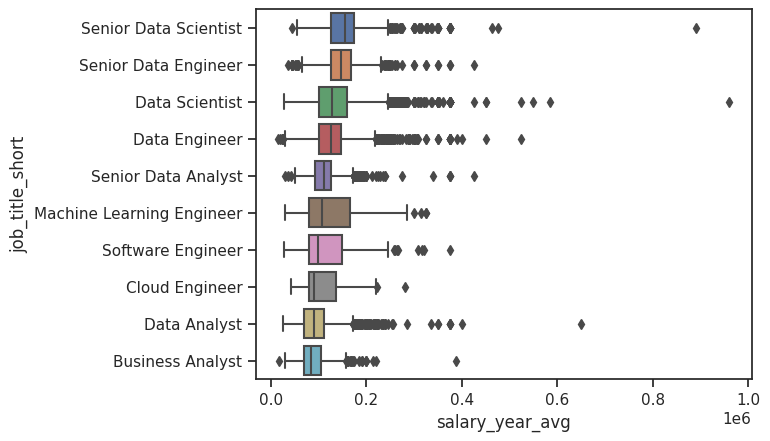

In [10]:
# data["job_title_short"].value_counts()
sns.boxplot(data=data, x="salary_year_avg", y="job_title_short", order=job_in_order)